In [1]:
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns
import pandas as pd
from scipy.stats import norm, kde, kstest, stats
from numpy import inf
import itertools
%matplotlib inline
import warnings




%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)
data_path = "C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\cbt.csv"
fa = pd.read_csv(data_path)
data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\'

In [2]:
fa['day'] = pd.to_datetime(fa['day'])
fa['day']= fa.day.dt.date
fa.set_index('day', inplace=True)
fa.index.freq = 'D'

In [3]:
# noo fa = fa1[['time', 'emails_received']].copy()
#fa['time'] = pd.to_datetime(fa['time'], utc = True)
#fa['time']= fa.time.dt.date
#fa.set_index('time', inplace=True)

In [4]:
fa

,emails_received
day,
2015-03-23,474483.0
2015-03-24,378195.0
2015-03-25,423666.0
2015-03-26,405663.0
2015-03-27,342226.0
2015-03-28,154766.0
2015-03-29,162389.0
2015-03-30,407661.0
2015-03-31,465110.0


In [5]:
fa.size

1585

In [6]:
fa.index.freq = 'D'

In [7]:
fa

,emails_received
day,
2015-03-23,474483.0
2015-03-24,378195.0
2015-03-25,423666.0
2015-03-26,405663.0
2015-03-27,342226.0
2015-03-28,154766.0
2015-03-29,162389.0
2015-03-30,407661.0
2015-03-31,465110.0


In [8]:
train, test = fa.iloc[:1268], fa.iloc[1268:]
train = train.asfreq('D')
test = test.asfreq('D')

In [11]:
def find_best_sarima(train, eval_metric):
    
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    counter = 0
    myDict = {}
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                counter += 1
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                myDict[counter] = [results.aic, results.bic, param, param_seasonal]

            except:
                continue
                
    dict_to_df = pd.DataFrame.from_dict(myDict,orient='index')
    
    if eval_metric == 'aic':
        best_run = dict_to_df[dict_to_df[0] == dict_to_df[0].min()].index.values
        best_run = best_run[0]
    elif eval_metric == 'bic':
        best_run = dict_to_df[dict_to_df[1] == dict_to_df[1].min()].index.values
        best_run = best_run[0]
            
    model = sm.tsa.statespace.SARIMAX(train,
                                      order=myDict[best_run][2],
                                      seasonal_order=myDict[best_run][3],
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()
    
    best_model = {'model':model, 
                  'aic':model.aic,
                  'bic':model.bic,
                  'order':myDict[best_run][2], 
                  'seasonal_order':myDict[best_run][3]}
    
    return best_model

In [15]:
#best = find_best_sarima(train, 'bic')
best = sm.tsa.statespace.SARIMAX(train, order=(1,1,1),seasonal_order=(0,0,1,365))



In [16]:
best = best.fit()

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [17]:
best

In [269]:
test['emails_received'].index[0]

Timestamp('2018-10-04 00:00:00', freq='D')

In [270]:
#import datetime as dt
test['emails_received'].index[-1]

Timestamp('2019-08-17 00:00:00', freq='D')

In [ ]:
#pred= best['model'].predict(start= test.index[0] ,end = test.index[-1])
pred= best.predict(start= test.index[0] ,end = test.index[-1])

In [272]:
pred

2018-10-04    4.414517e+05
2018-10-05    4.033045e+05
2018-10-06    3.684537e+05
2018-10-07    3.366145e+05
2018-10-08    3.075266e+05
2018-10-09    2.809523e+05
2018-10-10    2.566743e+05
2018-10-11    2.344943e+05
2018-10-12    2.142309e+05
2018-10-13    1.957186e+05
2018-10-14    1.788059e+05
2018-10-15    1.633548e+05
2018-10-16    1.492388e+05
2018-10-17    1.363426e+05
2018-10-18    1.245608e+05
2018-10-19    1.137971e+05
2018-10-20    1.039636e+05
2018-10-21    9.497975e+04
2018-10-22    8.677225e+04
2018-10-23    7.927400e+04
2018-10-24    7.242369e+04
2018-10-25    6.616533e+04
2018-10-26    6.044778e+04
2018-10-27    5.522430e+04
2018-10-28    5.045220e+04
2018-10-29    4.609247e+04
2018-10-30    4.210948e+04
2018-10-31    3.847067e+04
2018-11-01    3.514630e+04
2018-11-02    3.210920e+04
2018-11-03    2.933455e+04
2018-11-04    2.679966e+04
2018-11-05    2.448382e+04
2018-11-06    2.236809e+04
2018-11-07    2.043520e+04
2018-11-08    1.866933e+04
2018-11-09    1.705606e+04
2

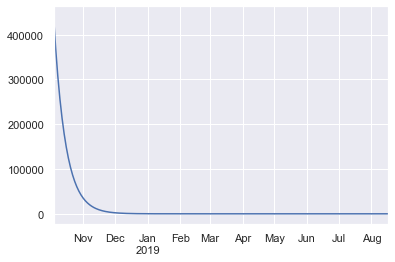

In [273]:
pred.plot()

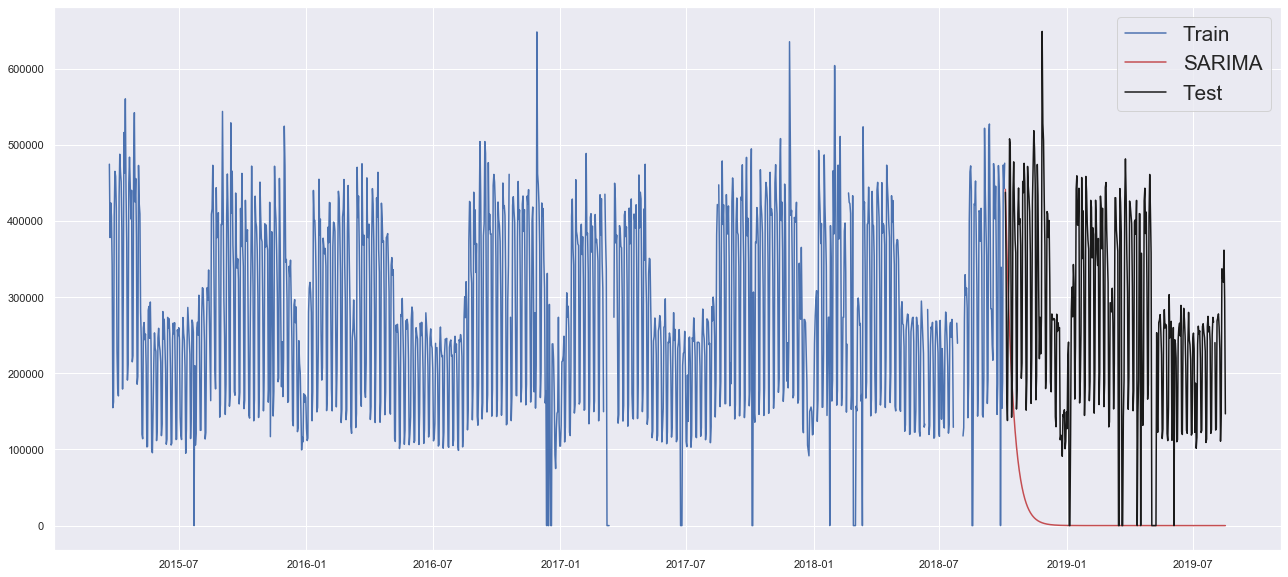

In [274]:

plt.figure(figsize=(22, 10))
plt.plot(train.index, train, label='Train')
plt.plot(pred.index, pred, label='SARIMA', color='r')
plt.plot(test.index, test, label='Test', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()

In [ ]:
from matplotlib import pyplot
pyplot.plot(test)
#pyplot.plot(pred.index, color='red')

In [ ]:
pyplot.plot(pred)

In [ ]:
pyplot.plot(test.values)

In [ ]:
from matplotlib import pyplot
pyplot.plot(fa)
pyplot.plot(predictions, color='red')
plt.figure(figsize=(200,10))
pyplot.show()